**Load the data**


In [2]:
### Load Data
import pandas as pd
df = pd.read_csv('/content/sample_data/titanic3.csv')

In [13]:
df.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


# Data Cleaning Steps

**Handling Missing Values**

In [14]:
### Fills missing values in the 'Age' column with the median age.

df['age'].fillna(df['age'].median(), inplace=True)

<ipython-input-14-52ac7884633d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


**Removing Duplicates:**

In [16]:
### Removes duplicate rows from the dataset.
df.drop_duplicates(inplace=True)

**Correcting Data Types:**

In [18]:
### Converts the 'Pclass' column to a categorical data type.
df['pclass'] = df['pclass'].astype('category')

**Standardizing Formats:**

In [20]:
### Strips any leading/trailing spaces and converts all entries in the 'Embarked' column to uppercase.
df['embarked'] = df['embarked'].str.strip().str.upper()

**Filtering Outliers:**

In [21]:
### Caps the 'Fare' values at the 95th percentile to handle outliers.
fare_upper_limit = df['fare'].quantile(0.95)
df['fare'] = df['fare'].apply(lambda x: fare_upper_limit if x > fare_upper_limit else x)


**Handling Inconsistencies:**

In [23]:
### Converts all entries in the 'Name' column to title case (e.g., "john smith" to "John Smith").
df['name'] = df['name'].str.title()


**Replace 'Survived' column values:**

In [24]:
### Replaces values in the 'Survived' column: 0 becomes 'No' and 1 becomes 'Yes'.
df['survived'] = df['survived'].replace({0: 'No', 1: 'Yes'})


**Save the cleaned data to a new CSV file:**

In [25]:
### Saves the cleaned dataset to a new CSV file called 'titanic_cleaned.csv'.
df.to_csv('titanic_cleaned.csv', index=False)


**Print completion message:**

In [26]:
### Prints a message indicating that data cleaning is completed and the 'Survived' column has been updated.
print("Data cleaning completed and 'Survived' column updated. Saved to 'titanic_cleaned.csv'")


Data cleaning completed and 'Survived' column updated. Saved to 'titanic_cleaned.csv'


# Data  Visualization

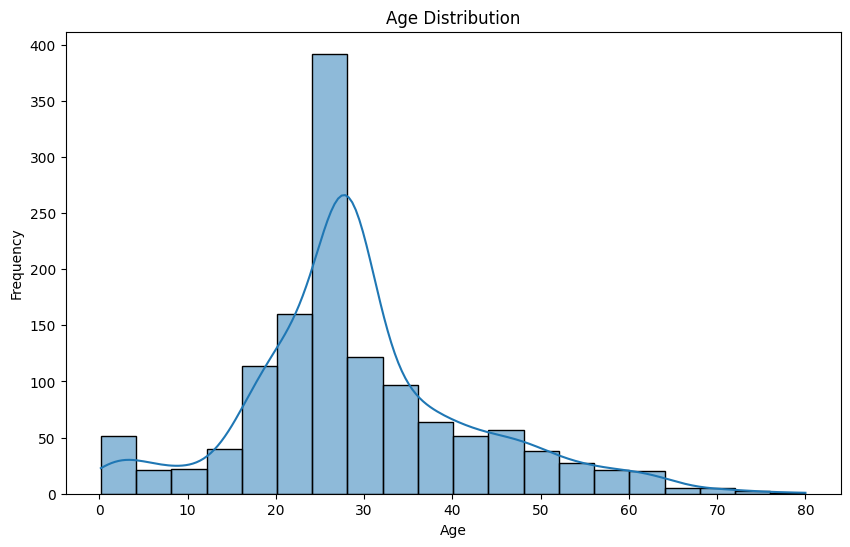

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data
data = pd.read_csv('titanic_cleaned.csv')

# Univariate Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Age Distribution This histogram provides a visual representation of the age distribution of Titanic passengers. The curve (KDE) gives an estimate of the probability density function of age, making it easy to see where most passengers' ages lie

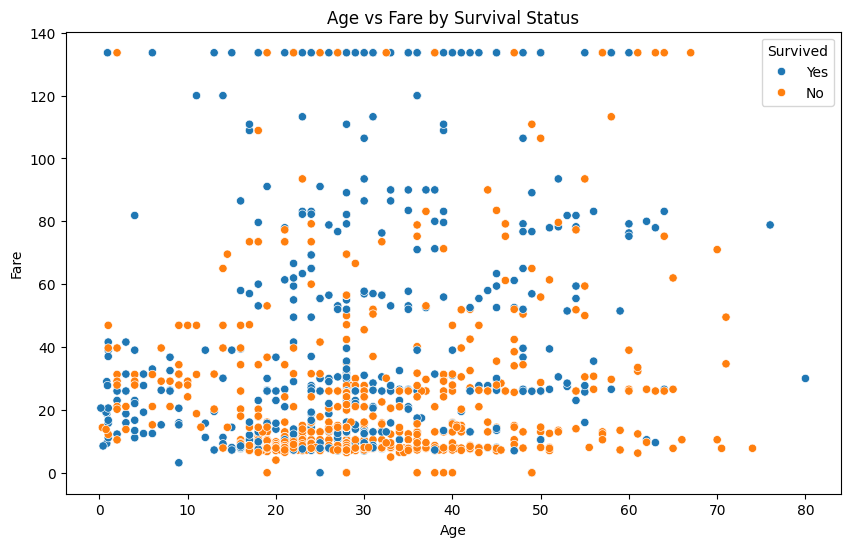

In [42]:
# Bivariate Analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='fare', hue='survived')
plt.title('Age vs Fare by Survival Status')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived')
plt.show()

# Age vs Fare by Survival Status This scatter plot shows the relationship between age and fare, with different colors representing whether the passenger survived or not. It helps us understand how fare and age might have influenced survival chances.

<ipython-input-43-c5fd8b5e66e5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pclass', y='age', data=df, palette='Set3')


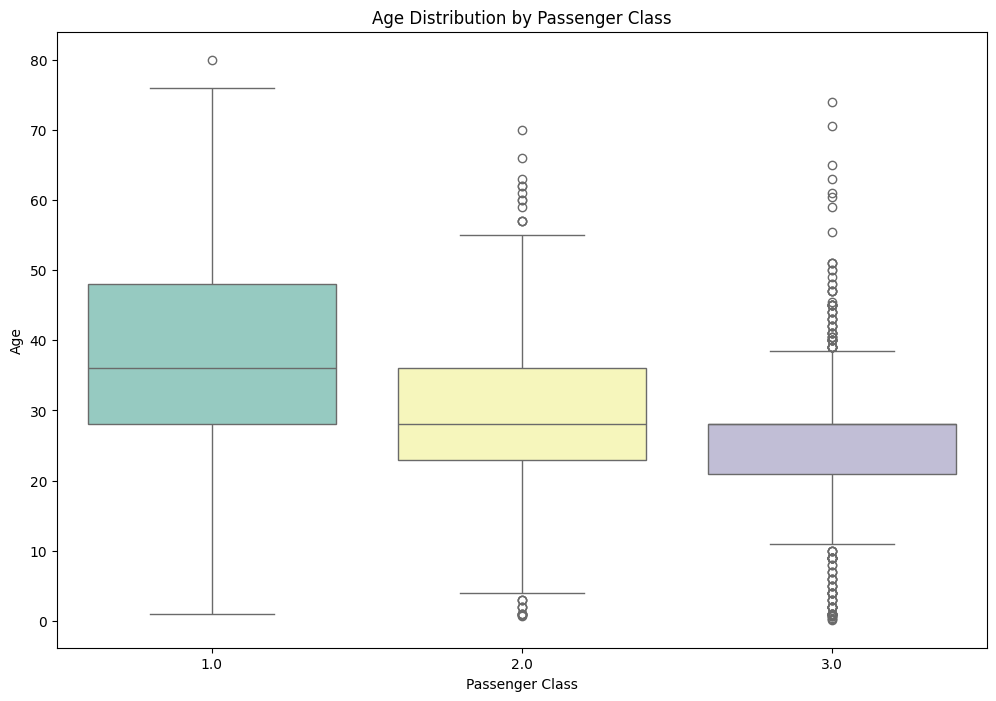

In [43]:
# Optimizing Graphs: Titles, Labels, Legends, Colors, Size
plt.figure(figsize=(12, 8))
sns.boxplot(x='pclass', y='age', data=df, palette='Set3')
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

# Age Distribution by Passenger Class This box plot displays the age distribution within each passenger class. It highlights the median age, and the spread of ages, and identifies any potential outliers within each class

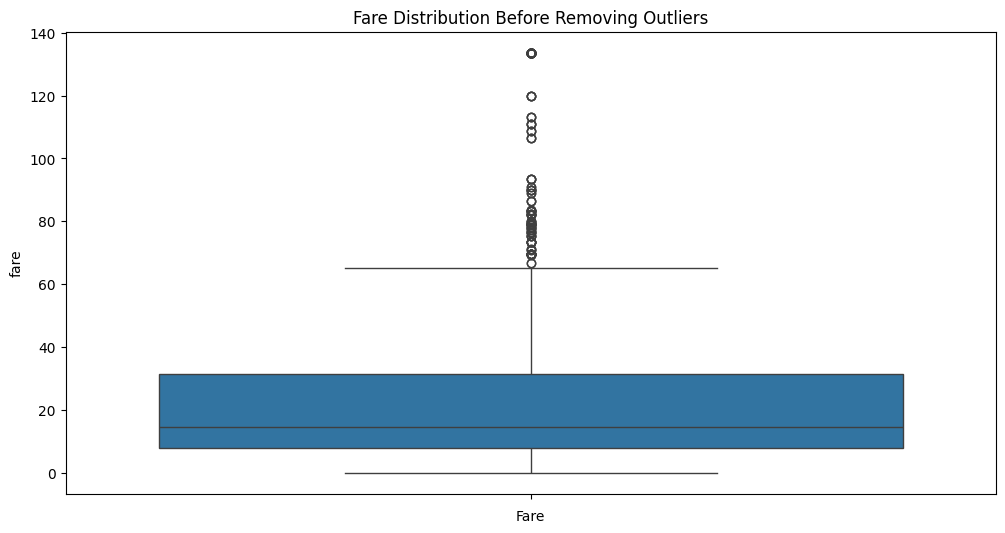

In [44]:
# Impact of Removing Outliers
# Before removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(df['fare'])
plt.title('Fare Distribution Before Removing Outliers')
plt.xlabel('Fare')
plt.show()

# Fare Distribution Before Removing Outliers This box plot shows the fare distribution before outliers are removed, with potential outliers displayed as points outside the main range.

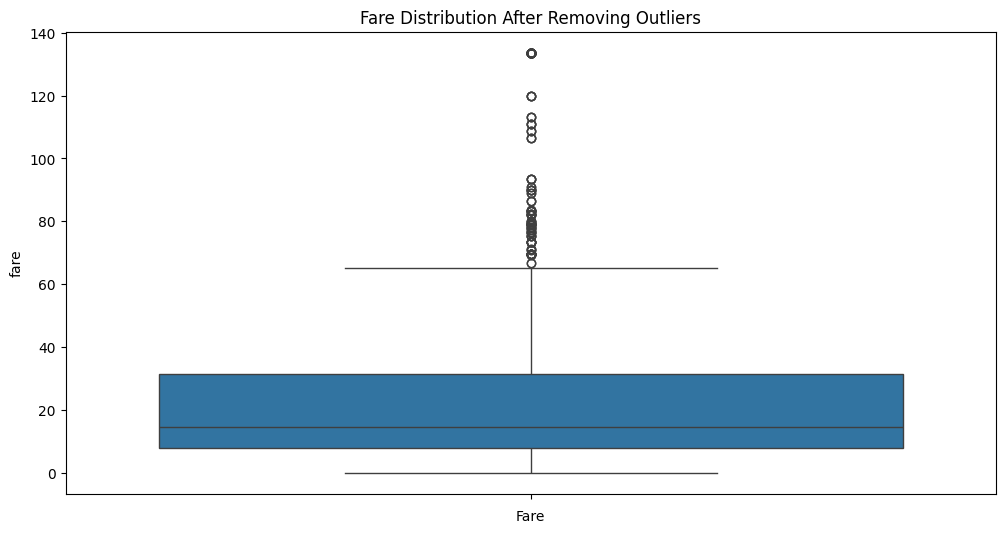

In [45]:
# Remove outliers
fare_upper_limit = df['fare'].quantile(0.95)
df_no_outliers = df[df['fare'] <= fare_upper_limit]

# After removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(df_no_outliers['fare'])
plt.title('Fare Distribution After Removing Outliers')
plt.xlabel('Fare')
plt.show()

# Fare Distribution After Removing Outliers This box plot displays the fare distribution after removing the outliers. Notice the reduction in extreme values, making the data cleaner and more robust for analysis

In [46]:
descriptive_stats = df.describe()
print(descriptive_stats)


               age        sibsp        parch         fare        body
count  1310.000000  1309.000000  1309.000000  1308.000000  121.000000
mean     29.502036     0.498854     0.385027    29.163863  160.809917
std      12.900383     1.041658     0.865560    33.059162   97.696922
min       0.166700     0.000000     0.000000     0.000000    1.000000
25%      22.000000     0.000000     0.000000     7.895800   72.000000
50%      28.000000     0.000000     0.000000    14.454200  155.000000
75%      35.000000     1.000000     0.000000    31.275000  256.000000
max      80.000000     8.000000     9.000000   133.650000  328.000000


In [48]:
import plotly.express as px

# Univariate Analysis - Age Distribution
fig = px.histogram(df, x='age', nbins=20, title='Age Distribution')
fig.show()

# Bivariate Analysis - Age vs Fare by Survival Status
fig = px.scatter(df, x='age', y='fare', color='survived', title='Age vs Fare by Survival Status')
fig.show()
